<a href="https://colab.research.google.com/github/nirvanK11/-predicting-diabetes-using-DL-ipynb/blob/main/predicting_diabetes_using_DL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics   

from tensorflow.keras.layers import Dropout
import tensorflow as tf

### **Dataset Description**
*   A1 - Number of times pregnant
*   A2 - Plasma glucose concentration a 2 hours in an
oral glucose tolerance test
*   A3 - Diastolic blood pressure (mm Hg)
*   A4 - Triceps skin fold thickness (mm)
*   A5 - 2-Hour serum insulin (mu U/ml)
*   A6 - Body mass index (weight in kg/(height in m)^2)
*   A7 - Diabetes pedigree function
*   A8 - Age (years)



In [ ]:
data = pd.read_csv('/content/train.csv')
data

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
663,664,9,145,80,46,130,37.9,0.637,40,1
664,665,6,115,60,39,0,33.7,0.245,40,1
665,666,1,112,80,45,132,34.8,0.217,24,0
666,667,4,145,82,18,0,32.5,0.235,70,1


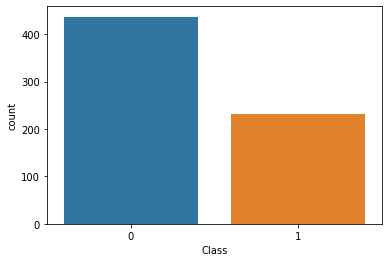

In [ ]:
sns.countplot(x=data['Class'])

## **Splitting the Data**

In [ ]:
# extract labels
y = data['Class']
y = pd.Series(y)
print(y.value_counts())

# remove unnecessary columns
X = data.drop(['Id', 'Class'], axis=1)
print(X.info())
X.head()

0    437
1    231
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


## **Building the Model**

In [ ]:
# define the keras model
model1 = Sequential()
model1.add(Dense(units=64, input_dim=8, activation='relu'))
model1.add(Dense(units=32, activation='relu'))
#model1.add(Dense(units=80, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
import tensorflow as tf
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)


In [ ]:
# Compile the model with the optimiser object
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# train model
history = model1.fit(X_train1, y_train1, batch_size=10, epochs=60, validation_data=(X_val1, y_val1))



Epoch 1/60
47/47 [==============================] - 1s 9ms/step - loss: 5.3584 - accuracy: 0.5717 - val_loss: 0.9888 - val_accuracy: 0.5423
Epoch 2/60
47/47 [==============================] - 0s 6ms/step - loss: 0.8547 - accuracy: 0.5739 - val_loss: 0.7388 - val_accuracy: 0.6169
Epoch 3/60
47/47 [==============================] - 0s 5ms/step - loss: 0.7297 - accuracy: 0.6574 - val_loss: 0.6835 - val_accuracy: 0.6965
Epoch 4/60
47/47 [==============================] - 0s 5ms/step - loss: 0.8410 - accuracy: 0.6253 - val_loss: 0.6088 - val_accuracy: 0.6667
Epoch 5/60
47/47 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.6660 - val_loss: 0.8845 - val_accuracy: 0.6219
Epoch 6/60
47/47 [==============================] - 0s 5ms/step - loss: 0.7280 - accuracy: 0.6681 - val_loss: 0.5929 - val_accuracy: 0.7164
Epoch 7/60
47/47 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.7066 - val_loss: 0.5896 - val_accuracy: 0.7065
Epoch 8/60
47/47 [==

## **Plotting the graph**

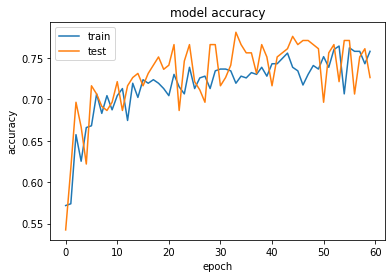

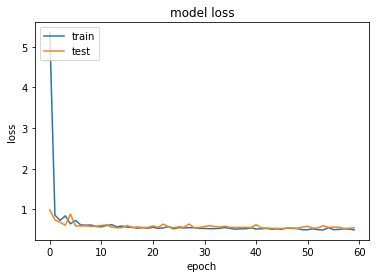

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### **Validate the model**

In [ ]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.24326558]
 [0.81433177]
 [0.31139174]
 [0.22917213]
 [0.6922284 ]
 [0.01657616]
 [0.60635406]
 [0.2654938 ]
 [0.57249874]
 [0.12998994]]


In [ ]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0]


In [ ]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7263681592039801



## **Test Prediction**

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test


,Id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47
...,...,...,...,...,...,...,...,...,...
95,96,10,101,76,48,180,32.9,0.171,63
96,97,2,122,70,27,0,36.8,0.340,27
97,98,5,121,72,23,112,26.2,0.245,30
98,99,1,126,60,0,0,30.1,0.349,47


In [ ]:
# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
# create LabelEncoder for labels 
predictions = model1.predict(X_test)
print(predictions)

final_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
print(final_predictions)


[[0.57958686]
 [0.58474547]
 [0.7687314 ]
 [0.2120356 ]
 [0.09562472]
 [0.23208232]
 [0.03703926]
 [0.7772438 ]
 [0.15711677]
 [0.23239082]
 [0.47860005]
 [0.4660602 ]
 [0.12843443]
 [0.57391655]
 [0.28074852]
 [0.22096422]
 [0.02523561]
 [0.5631984 ]
 [0.26905257]
 [0.30313158]
 [0.50903887]
 [0.62904906]
 [0.1776535 ]
 [0.3206506 ]
 [0.37768462]
 [0.5801645 ]
 [0.12714918]
 [0.71076655]
 [0.56920826]
 [0.5139292 ]
 [0.31645387]
 [0.45122528]
 [0.5225181 ]
 [0.33330706]
 [0.5027186 ]
 [0.15272939]
 [0.26218176]
 [0.12138066]
 [0.00187583]
 [0.59735006]
 [0.62749577]
 [0.38727036]
 [0.78384095]
 [0.3173483 ]
 [0.5428049 ]
 [0.6807728 ]
 [0.1461826 ]
 [0.9563318 ]
 [0.7254625 ]
 [0.21370938]
 [0.47276106]
 [0.24352069]
 [0.07139808]
 [0.4949482 ]
 [0.5713528 ]
 [0.39331234]
 [0.1053131 ]
 [0.27161962]
 [0.44540486]
 [0.20422092]
 [0.15137796]
 [0.23833174]
 [0.3342386 ]
 [0.13789693]
 [0.543066  ]
 [0.45165515]
 [0.11160091]
 [0.261682  ]
 [0.16146235]
 [0.16060014]
 [0.38966224]
 [0.23

In [ ]:
df_submission = pd.DataFrame(df_test['Id'])
df_submission['Class'] = final_predictions

In [ ]:
df_submission.to_csv('/content/test-predictions.csv', index=False)

In [ ]:
Test_pred=pd.read_csv('/content/test-predictions.csv')
Test_pred

,Id,Class
0,1,1
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
95,96,1
96,97,0
97,98,0
98,99,0


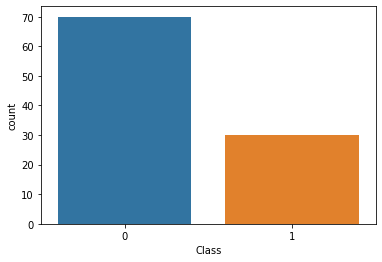

In [ ]:
# Summarise class details
sns.countplot(x=Test_pred['Class'])

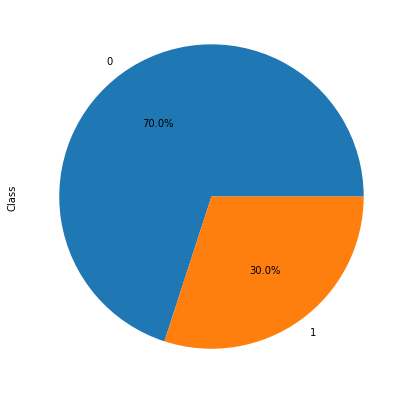

In [ ]:
Test_pred["Class"].value_counts().plot(kind ="pie", autopct='%1.1f%%', figsize=(7,7));